C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


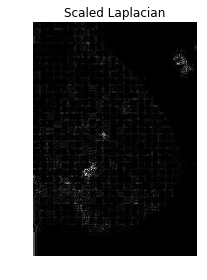

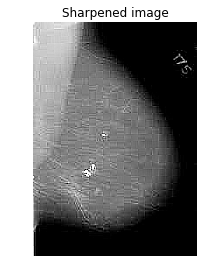

True

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
import scipy.ndimage.filters
import cv2

# Function for plotting abs:
pic_num       = 1
def show_abs(I, plot_title, pic_num):
    plt.figure(pic_num)
    plt.title(plot_title)
    plt.tight_layout()
    plt.axis('off')
    plt.imshow(abs(I), plt.cm.gray)
    return pic_num+1

# Reading of the image into numpy array:
A0           = scipy.misc.imread('lmam1.jpg', flatten=True)
# Map values to the (0, 255) range:
A0           = (A0 - np.amin(A0))*255.0 /(np.amax(A0)-np.amin(A0)) 

# Kernel for negative Laplacian:
kernel      = np.ones((3,3))*(-1)
kernel[1,1] = 8

# Convolution of the image with the kernel:
Lap        = scipy.ndimage.filters.convolve(A0, kernel)

#Map Laplacian to some new range:
ShF         = 100                   #Sharpening factor!
Laps        = Lap*ShF/np.amax(Lap) 
    
# Add negative Laplacian to the original image:
A           = A0 + Laps 
# Set negative values to 0, values over 255 to 255:
A = np.clip(A, 0, 255)

# Image the result:
pic_num = show_abs(Laps, 'Scaled Laplacian', pic_num)
pic_num = show_abs(A, 'Sharpened image', pic_num)
plt.show()

cv.imwrite('l4.jpg',Laps)
cv.imwrite('lmam4.jpg',A)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


Img          255.0 0.0
Original Lap 544.773 -253.946
Scaled Lap   100.0 -46.6151
SharpImg     273.064 -24.0047
SharpImg abs 273.064 0.00571442
SharpImg after scaling 255.0 0.0053364




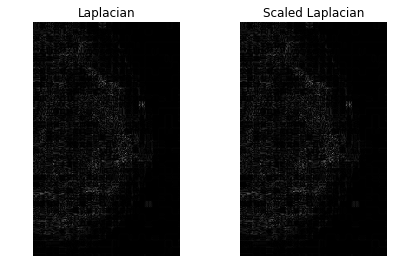

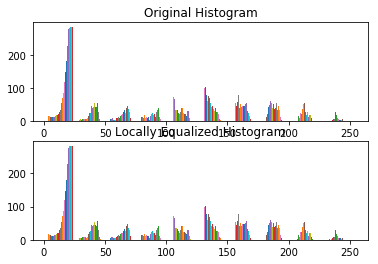

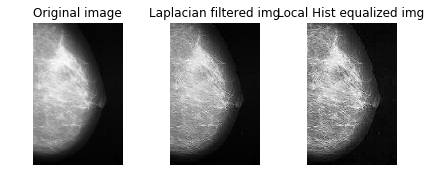

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.misc
import scipy.ndimage.filters
import cv2

#Function for plotting abs:
pic_n       = 1
def show_abs(I, plot_title):
    plt.title(plot_title)
    plt.tight_layout()
    plt.axis('off')
    plt.imshow(abs(I), cm.gray)

#Reading of the image into numpy array:
A0           = scipy.misc.imread('mam4.jpg', flatten=True)
A0          -= np.amin(A0)#map values to the (0, 255) range
A0          *= 255.0/np.amax(A0)
print('Img         ', np.amax(A0), np.amin(A0))
#>>> Img          255.0 0.0

#Kernel for negative Laplacian
kernel      = np.ones((3,3))*(-1)
kernel[1,1] = 8

#Convolution of the image with the kernel:
Lap        = scipy.ndimage.filters.convolve(A0, kernel)

#Laplacian now has negative values
print('Original Lap', np.amax(Lap), np.amin(Lap))
#>>> Original Lap 1151.0 -1166.0

#Map Laplacian to some new range:
Laps        = Lap*100.0/np.amax(Lap) #Sharpening factor
print('Scaled Lap  ', np.amax(Laps), np.amin(Laps))
#>>> Scaled Lap   100.0 -101.303

plt.figure(pic_n)
pic_n += 1
plt.subplot(1,2,1)
show_abs(Lap, 'Laplacian')
plt.subplot(1,2,2)
show_abs(Laps, 'Scaled Laplacian')

A           = A0 + Laps #Add negative Laplacian to the original image

print('SharpImg    ', np.amax(A), np.amin(A))
#>>> SharpImg     350.917 -81.06

A = abs(A) #Get rid of negative values
print('SharpImg abs', np.amax(A), np.amin(A))

A           *= 255.0/np.amax(A)
print('SharpImg after scaling', np.amax(A), np.amin(A))
#>>> SharpImg abs 350.917 0.0

# Local Histogram Equalization with OpenCV:
A_cv2       = A
A_cv2       = A_cv2.astype(np.uint8)

tile_s0     = 8
tile_s1     = 8

clahe       = cv2.createCLAHE(clipLimit=1, tileGridSize=(tile_s0,tile_s1))
A_cv2       = clahe.apply(A_cv2)

plt.figure(pic_n)
pic_n += 1
plt.subplot(2,1,1)
plt.hist(A_cv2)
plt.title('Original Histogram')
plt.subplot(2,1,2)
print("\n")
plt.hist(A_cv2)
plt.title('Locally Equalized Histogram')

plt.figure(pic_n)
pic_n += 1
plt.subplot(1,3,1)
show_abs(A0, 'Original image')
plt.subplot(1,3,2)
show_abs(A, 'Laplacian filtered img')
plt.subplot(1,3,3)
show_abs(A_cv2, 'Local Hist equalized img')
plt.show()

#cv.imwrite('lap4.jpg',A)
#cv.imwrite('h4.jpg',A_cv2)
